In [177]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as gauss
#from scipy import spatial
#cos_sim = spatial.distance.cosine
from itertools import repeat
from functools import partial
times = partial(repeat, None)

def angle_between(x,y):
    x_mag = np.sqrt((x*x).sum())
    y_mag = np.sqrt((y*y).sum())
    dot_prod = (x*y).sum()
    normed_prod = dot_prod/(x_mag*y_mag)
    return (90/(np.pi/2))*np.arccos(normed_prod)

### Experiment 1: Location of Probability Mass

A paper I saw claimed that most of the probability mass of high dimensional spherical gaussians was concentrated around the "equator". That seems particular odd as Gaussians are symmetric across all dimensions. To test that I will draw multiple samples from a high dimensional Gaussian and find the angle between them and a reference 'pole'. If the points are concetrated around some belt, then the distribution of these angles should be unimodal. If not, then the angles should be more or less uniform.

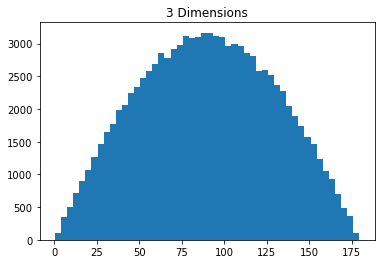

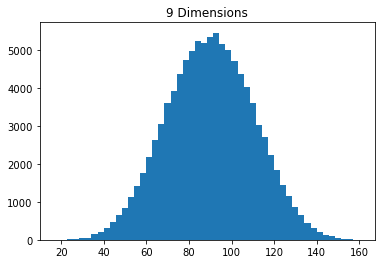

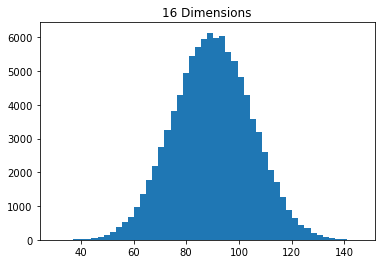

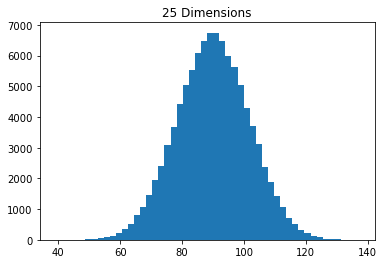

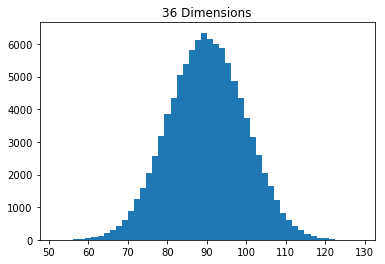

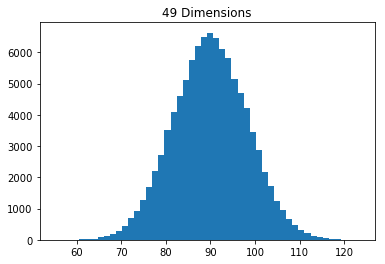

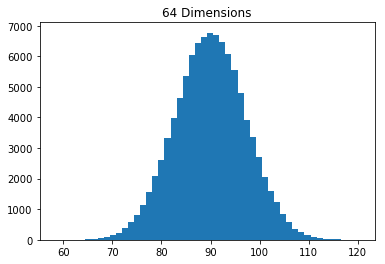

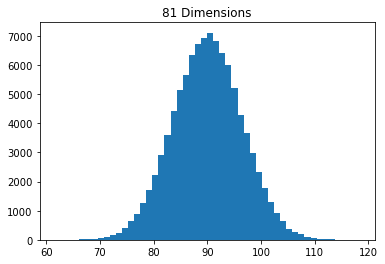

In [176]:
for dim in [3,9,16,25,36,49,64,81]:
    samples = gauss(mean=np.zeros(dim), cov=np.eye(dim), size=100000)
    pole = np.zeros(dim)
    pole[0] = 1
    angles = [angle_between(pole,sample) for sample in samples]
    plt.hist(angles,bins=50); plt.title(f"{dim} Dimensions"); plt.show()
    plt.clf()

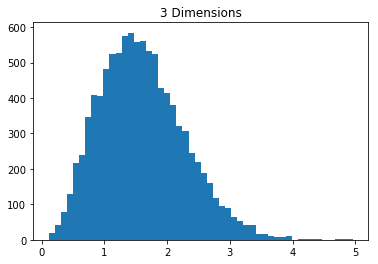

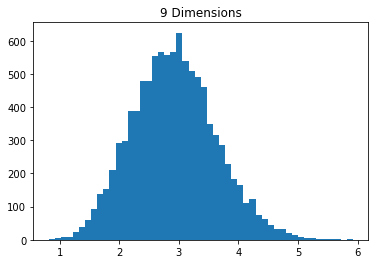

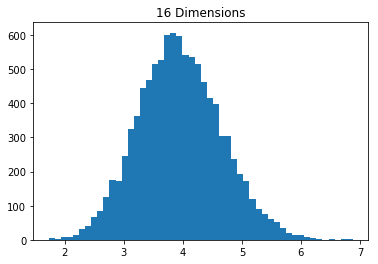

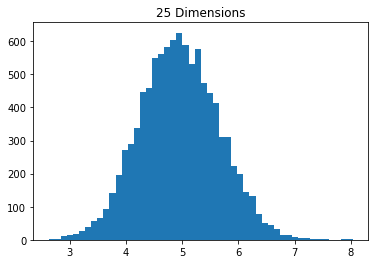

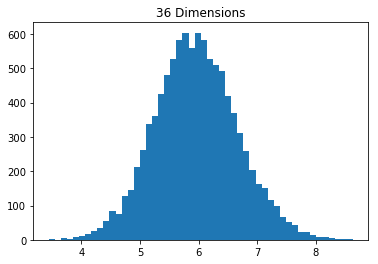

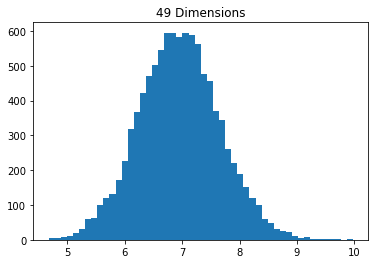

In [175]:
for dim in [3,9,16,25,36,49]:
    samples = gauss(mean=np.zeros(dim), cov=np.eye(dim), size=10000)
    lengths = [np.sqrt((sample*sample).sum()) for sample in samples]
    plt.hist(lengths,bins=50); plt.title(f"{dim} Dimensions"); plt.show()
    plt.clf()

In [153]:
from itertools import repeat
from functools import partial
from random import random
import time
times = partial(repeat, None)
iterations = 1000000

ts = time.time()
min(random() for i in range(iterations))
tf = time.time()
print((tf-ts))

ts = time.time()
min(random() for _ in times(iterations))
tf = time.time()
print((tf-ts))

0.22506213188171387


0.19674229621887207
